In [1]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

import sklearn

from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB



In [2]:
german_data = pd.read_csv("german_data.csv", header = None)
# Change data column names
german_data.columns = ['check_acc', 'duration', 'cred_hist', 'purpose',
                      'amount', 'savings', 'employment', 'install_rate',
                      'gender_status', 'guarantors', 'residence', 'property',
                      'age', 'other_install', 'housing', 'exist_credit',
                      'job', 'liable_maintenance', 'telephone', 'foreign_worker',
                      'default']
# Defaulted == 1
german_data['default'] = german_data['default'] - 1

In [3]:
german_copy = pd.DataFrame(german_data.copy())

In [4]:
# Create an extra column solely based on gender without status
# Protected group (female) == 0
german_copy['gender'] = np.where(german_copy['gender_status'].str.contains('A91|A93|A94'), 1, 0)
german_copy = german_copy.drop(columns=['gender_status'])

In [5]:
# Check missing values
german_copy.isna().count()

check_acc             1000
duration              1000
cred_hist             1000
purpose               1000
amount                1000
savings               1000
employment            1000
install_rate          1000
guarantors            1000
residence             1000
property              1000
age                   1000
other_install         1000
housing               1000
exist_credit          1000
job                   1000
liable_maintenance    1000
telephone             1000
foreign_worker        1000
default               1000
gender                1000
dtype: int64

In [6]:
agecolumn = german_copy['age'].copy()

# Protected group (young & old) == 0
for i in range(0,len(agecolumn)):
    if agecolumn[i] <= 75 and agecolumn[i] > 30:
        agecolumn[i] = 1
    else: 
        agecolumn[i] = 0
        
german_copy['age'] = agecolumn

In [7]:
# One Hot Encoding columns
german_copy = pd.get_dummies(german_copy)

In [8]:
default_correlation = pd.DataFrame(german_copy.corr())['default']
default_correlation = list(default_correlation.sort_values(ascending = False)[abs(default_correlation) < 0.05].to_dict().keys())

german_copy = german_copy.drop(default_correlation, axis = 1)

In [9]:
# An overview of the whole German dataset
german_copy.groupby(['gender','age','default']).count()

duration  amount  install_rate  check_acc_A11  \
gender age default                                                  
0      0   0             108     108           108            108   
           1              75      75            75             75   
       1   0              94      94            94             94   
           1              34      34            34             34   
1      0   0             156     156           156            156   
           1              72      72            72             72   
       1   0             343     343           343            343   
           1             118     118           118            118   

                    check_acc_A12  check_acc_A14  cred_hist_A30  \
gender age default                                                
0      0   0                  108            108            108   
           1                   75             75             75   
       1   0                   94             94             94   
           1                   34             34             34   
1      0   0                  156            156            156   
           1                   72             72             72   
       1   0                  343            343            343   
           1                  118            118            118   

                    cred_hist_A31  cred_hist_A34  purpose_A40  ...  \
gender age default                                             ...   
0      0   0                  108            108          108  ...   
           1                   75             75           75  ...   
       1   0                   94             94           94  ...   
           1                   34             34           34  ...   
1      0   0                  156            156          156  ...   
           1                   72             72           72  ...   
       1   0                  343            343          343  ...   
           1                  118            118          118  ...   

                    property_A121  property_A124  other_install_A141  \
gender age default                                                     
0      0   0                  108            108                 108   
           1                   75             75                  75   
       1   0                   94             94                  94   
           1                   34             34                  34   
1      0   0                  156            156                 156   
           1                   72             72                  72   
       1   0                  343            343                 343   
           1                  118            118                 118   

                    other_install_A142  other_install_A143  housing_A151  \
gender age default                                                         
0      0   0                       108                 108           108   
           1                        75                  75            75   
       1   0                        94                  94            94   
           1                        34                  34            34   
1      0   0                       156                 156           156   
           1                        72                  72            72   
       1   0                       343                 343           343   
           1                       118                 118           118   

                    housing_A152  housing_A153  foreign_worker_A201  \
gender age default                                                    
0      0   0                 108           108                  108   
           1                  75            75                   75   
       1   0                  94            94                   94   
           1                  34            34                   34   
1      0   0                 156           156   

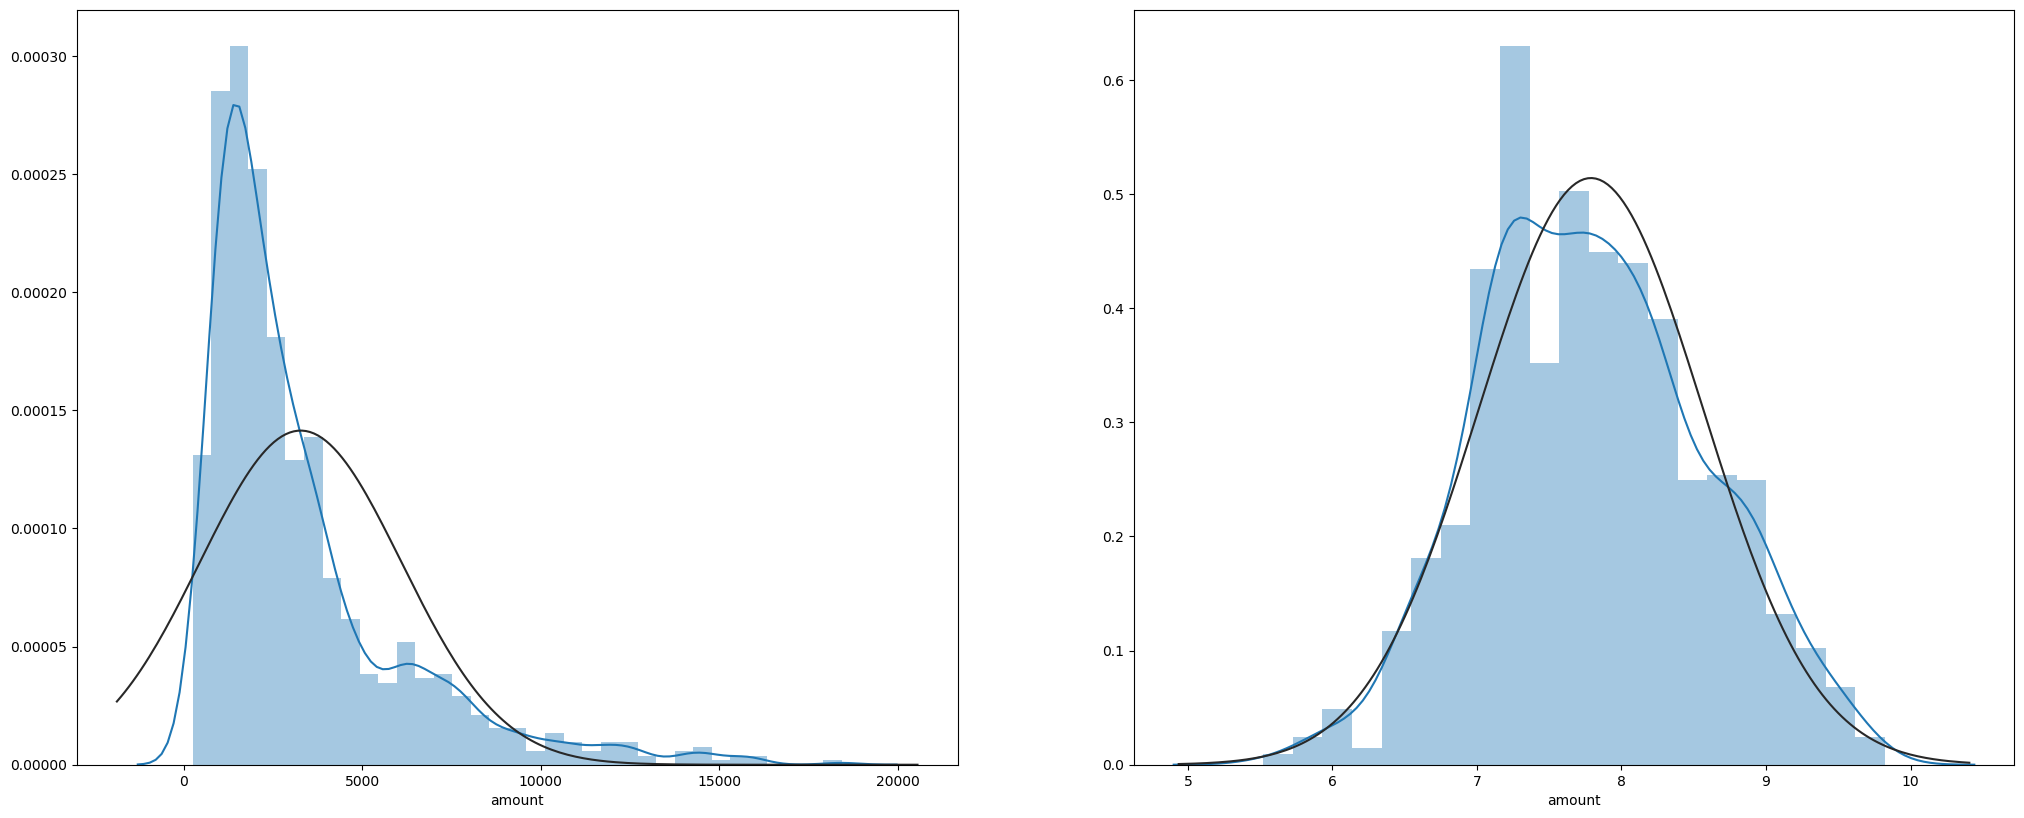

In [10]:
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['figure.dpi'] = 100
plt.subplot(1, 2, 1) 
sns.distplot(german_copy['amount'], fit = norm)
plt.subplot(1, 2, 2) 
sns.distplot(np.log(german_copy['amount']), fit = norm)

# Taking log normalises data
german_copy['amount'] = np.log(german_copy['amount'])

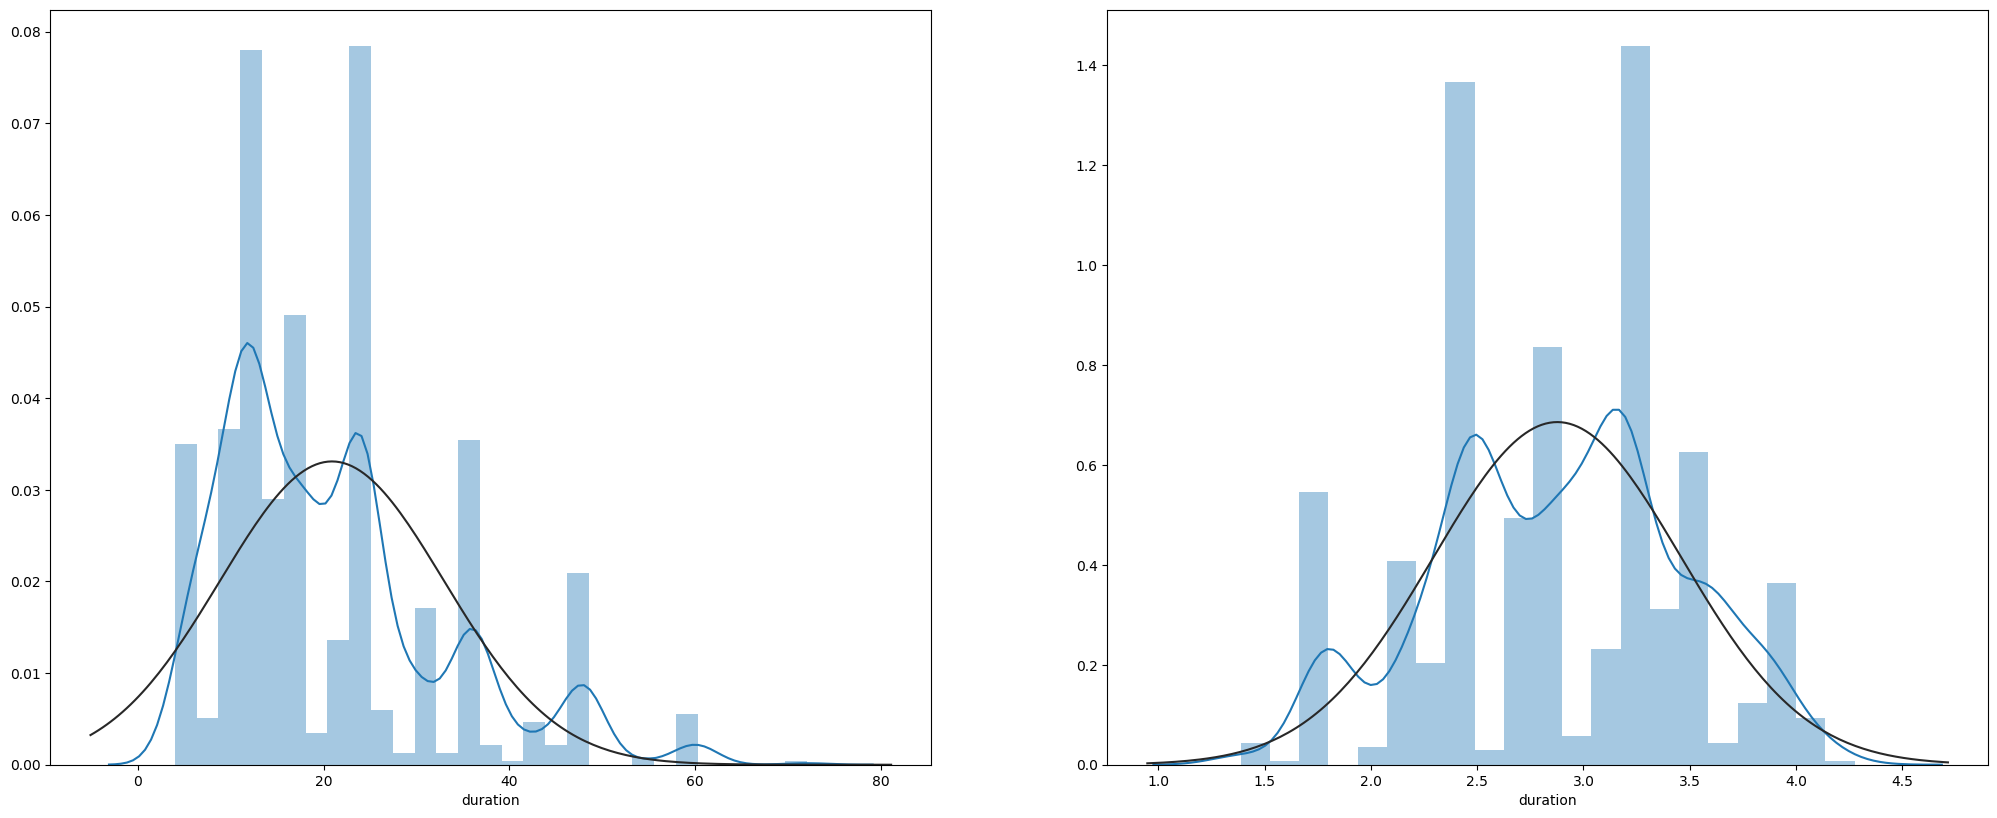

In [11]:
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['figure.dpi'] = 100
plt.subplot(1, 2, 1) 
sns.distplot(german_copy['duration'], fit = norm)
plt.subplot(1, 2, 2) 
sns.distplot(np.log(german_copy['duration']), fit = norm)

# Taking log normalises data
german_copy['duration'] = np.log(german_copy['duration'])

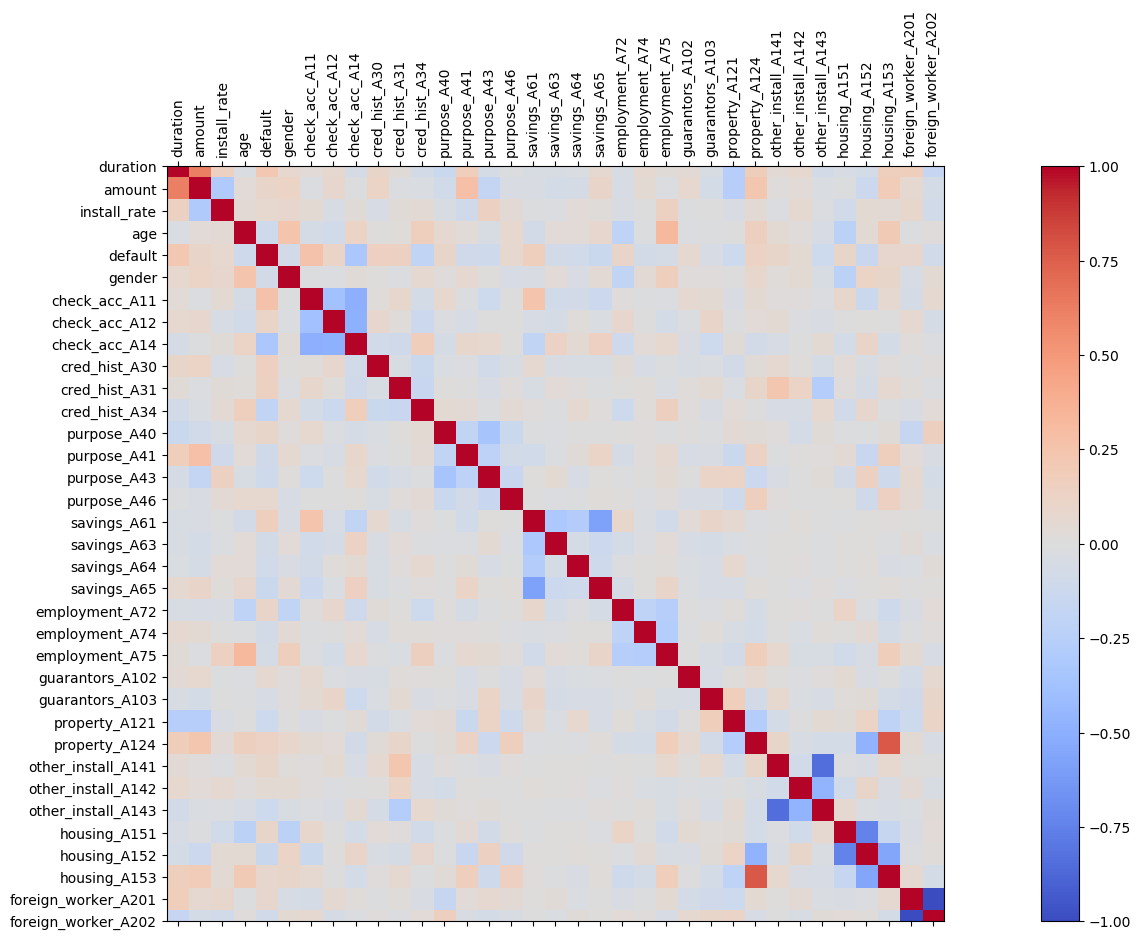

In [12]:
corr = german_copy.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(german_copy.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(german_copy.columns)
ax.set_yticklabels(german_copy.columns)
plt.show()

# Modify these columns due to dependency
german_copy.rename(columns = {'foreign_worker_A201':'foreign_worker_yes'}, inplace = True) 
del german_copy['foreign_worker_A202']

# Helper Functions

In [13]:
def fairness_check(list1, epsilon): 
    '''
        Checks if a list of numbers is within a range.
        To modify upper bound delete 'and x <= list1[0]*(1+epsilon)'
    '''
    c = 0 
    # traverse in the list1 
    for x in list1: 
        
        if x>= list1[0]*(1-epsilon) and x <= list1[0]*(1+epsilon) : 
            
            c+= 1 
            
    if c == 4:
        return True 
    else:
        return False
    
def fairness_check_odds(list1, list2, epsilon): 
    '''
        Checks if a list of numbers is within a range
        modified for equalised odds with two conditions.
        To modify upper bound delete 'and x <= list1[0]*(1+epsilon)' and 
                                    'and y <= list2[0]*(1+epsilon)'
    '''
    c = 0 
    # traverse in the list1 
    for x in list1: 
        
        if x>= list1[0]*(1-epsilon) and x <= list1[0]*(1+epsilon) : 
            
            c+= 1 
            
    d = 0 
    # traverse in the list2
    for y in list2: 
        
        if y>= list2[0]*(1-epsilon) and y <= list2[0]*(1+epsilon) : 
            
            d+= 1 
            
    if c == 4 and d == 4:
        return True 
    else:
        return False

def p_rule_check(list1, p):
    """
        Check if the p_rule is satisfied
    """
    x = 0
    for i in list1:
        if i >= p:
            x += 1
    if x == 4:
        return True
    else:
        return False

def german_stats(x,string,epsilon,p):
    
    """
    Splits dataset into male/female young(or old)/middle aged subsets in order
    to be able to get the confusion matrices for each of the protected attributes.
    
    Also prints checks for fairness definitions
    
    """
    
    confusion = pd.DataFrame(sklearn.metrics.confusion_matrix(x.default, x[string]))
    #confusion.columns = ['Pred Positive', 'Pred Negative']
    #confusion.index = ['True Positive', 'True Negative']
    
    print("% of correct prediction:", 
      round(sum(x.default == x[string])*100/len(x),2))
    print(confusion)
    print("")
    
    listy = ['male_unprotected', 'male_protected', 'female_unprotected', 'female_protected']
    df_dict = {}
    
    parity = []
    opportunity = []
    odds = []
    p_rule = []
    for df in listy:
        
        # Splitting results into male and female to get confusion matrices
        if 'female' in df:
            df_dict[df + '_results'] = x[x['gender'] == 0]
            if 'unprotected' in df:
                df_dict[df + '_results'] = df_dict[df + '_results'][df_dict[df + '_results']['age'] == 1]
            else:
                df_dict[df + '_results'] = df_dict[df + '_results'][df_dict[df + '_results']['age'] == 0]
                
        else:
            df_dict[df + '_results'] = x[x['gender'] == 1]
            if 'unprotected' in df:   
                df_dict[df + '_results'] = df_dict[df + '_results'][df_dict[df + '_results']['age'] == 1]
            else:
                df_dict[df + '_results'] = df_dict[df + '_results'][df_dict[df + '_results']['age'] == 0]

        # Easier to manually print metric rates
        confusion_matrix = pd.DataFrame(sklearn.metrics.confusion_matrix(df_dict[df + '_results'].default, df_dict[df + '_results'][string]))
        
        TPR = np.nan_to_num(round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))
        FPR = np.nan_to_num(round(confusion_matrix[1][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))
        FNR = np.nan_to_num(round(confusion_matrix[0][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
        TNR = np.nan_to_num(round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
        
        # Loop totaling the number of entries in a group (e.g. male unprotected, male protected etc.)
        total = 0
        for i in range(0,2):
            for k in range(0,2):
                total = total + confusion_matrix[i][k]
                
        positive = confusion_matrix[0][0]+confusion_matrix[0][1]
        negative = confusion_matrix[1][0]+confusion_matrix[1][1]

        parity.append(round((positive)/total,3))
        opportunity.append(round(pd.to_numeric(TPR),3))
        odds.append(round(pd.to_numeric(FPR),3))
        p_rule.append(positive)
        
        confusion_matrix.columns = ['Pred Positive', 'Pred Negative']
        confusion_matrix.index = ['True Positive', 'True Negative']
        
        print('The confusion matrix for ' + df + ' is:')
        print(confusion_matrix)
        print('')
        print('TPR: '+str(TPR)+', FPR: '+str(FPR)+', FNR: '+str(FNR)+', TNR: '+str(TNR))
        print('')
        print('')
    
    p_rule = parity/parity[0]
    p_rule = [round(x,3) for x in p_rule]
    
    parity_difference = []
    opp_difference = []
    odd_difference = []
    
    for i in range(0,3):
        parity_difference.append(abs(parity[0]-parity[i+1]))
        opp_difference.append(abs(opportunity[0]-opportunity[i+1]))
        odd_difference.append(abs(odds[0]-odds[i+1]))
    
    DI = []
    for i in range(0,3):
        DI.append(parity[i+1])
    DI = np.mean(DI)

    parity_difference = np.mean(parity_difference)
    opp_difference = np.mean(opp_difference)
    odd_difference = np.mean(odd_difference)

    
    print('The proportion of a given group being assigned to the positive group are :',parity)
    print('The boundaries for statistical parity are: ',round(parity[0]*(1-epsilon),3),round(parity[0]*(1+epsilon),3))
    print('Is statistical parity satisfied? ', fairness_check(parity, epsilon))
    print('Difference between assigned positive rates: ', round(parity_difference*100/parity[0],2))
    print('')
    print('The TPR rates are :',opportunity)
    print('The boundaries for equalised opportunity are: ',round(opportunity[0]*(1-epsilon),3),round(opportunity[0]*(1+epsilon),3))
    print('Is equalised opportunity satisfied? ', fairness_check(opportunity, epsilon))
    print('Difference between TPR: ', round(opp_difference*100/opportunity[0],2))
    print('')
    print('The TPR rates are :',opportunity)
    print('The FPR rates are :',odds)
    print('The boundaries for equalised odds are: ',round(opportunity[0]*(1-epsilon),3),round(opportunity[0]*(1+epsilon),3),
         ' (TPR) and: ', round(odds[0]*(1-epsilon),3),round(odds[0]*(1+epsilon),3), ' (FPR)')
    print('Is equalised odds satisfied? ', fairness_check_odds(opportunity, odds, epsilon))
    print('Average Difference: ', round((odd_difference*100/odds[0]+opp_difference*100/opportunity[0])/2,2)
    )
    print('')
    print('The p ratios are: ', p_rule)
    print('Is the p_rule satisfied? ', p_rule_check(p_rule, p))
    del p_rule[0]
    p_difference = round(np.mean([x - 0.8 for x in p_rule]),3)
    print('Average difference above: ', p_difference)
    print('')
    print('DI: ', round(DI/parity[0],2))
    print('CV: ', round(1-(parity[0]-DI),2))
        
        

In [14]:
# Splitting dataset
y = german_copy['default']
x = german_copy.drop('default',axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
# Creating new dataframe so I can store results
results = pd.DataFrame(y_test)
results['gender'] = x_test['gender']
results['age'] = x_test['age']

In [16]:
# An overview of the training data
x_train_copy = x_train.copy()
x_train_copy['default'] = y_train

x_train_copy.groupby(['gender','age','default']).count()

duration  amount  install_rate  check_acc_A11  \
gender age default                                                  
0      0   0              68      68            68             68   
           1              47      47            47             47   
       1   0              68      68            68             68   
           1              23      23            23             23   
1      0   0             109     109           109            109   
           1              51      51            51             51   
       1   0             242     242           242            242   
           1              92      92            92             92   

                    check_acc_A12  check_acc_A14  cred_hist_A30  \
gender age default                                                
0      0   0                   68             68             68   
           1                   47             47             47   
       1   0                   68             68             68   
           1                   23             23             23   
1      0   0                  109            109            109   
           1                   51             51             51   
       1   0                  242            242            242   
           1                   92             92             92   

                    cred_hist_A31  cred_hist_A34  purpose_A40  ...  \
gender age default                                             ...   
0      0   0                   68             68           68  ...   
           1                   47             47           47  ...   
       1   0                   68             68           68  ...   
           1                   23             23           23  ...   
1      0   0                  109            109          109  ...   
           1                   51             51           51  ...   
       1   0                  242            242          242  ...   
           1                   92             92           92  ...   

                    guarantors_A103  property_A121  property_A124  \
gender age default                                                  
0      0   0                     68             68             68   
           1                     47             47             47   
       1   0                     68             68             68   
           1                     23             23             23   
1      0   0                    109            109            109   
           1                     51             51             51   
       1   0                    242            242            242   
           1                     92             92             92   

                    other_install_A141  other_install_A142  \
gender age default                                           
0      0   0                        68                  68   
           1                        47                  47   
       1   0                        68                  68   
           1                        23                  23   
1      0   0                       109                 109   
           1                        51                  51   
       1   0                       242                 242   
           1                        92                  92   

                    other_install_A143  housing_A151  housing_A152  \
gender age default                                                   
0      0   0                        68            68            68   
           1                        47            47            47   
       1   0                        68            68            68   
           1                        23            23            23   
1      0   0                       109           109           109   
           1                        51            51            51   
       1   0                       242           242           242   
           1   

# Original

## Logistic

In [17]:
# Initiate logistic regression method
multi_class = sklearn.linear_model.LogisticRegression().fit(x_train,y_train)
results['logistic'] = multi_class.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# Stats for logistic method
german_stats(results,'logistic',0.1,0.8)

% of correct prediction: 75.67
     0   1
0  181  33
1   40  46

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             90             11
True Negative             11             15

TPR: 0.891, FPR: 0.109, FNR: 0.423, TNR: 0.577


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             37             10
True Negative              9             12

TPR: 0.787, FPR: 0.213, FNR: 0.429, TNR: 0.571


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             24              2
True Negative              6              5

TPR: 0.923, FPR: 0.077, FNR: 0.545, TNR: 0.455


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             30             10
True Negative             14             14

TPR: 0.75, FPR: 0.25, FNR: 0.5, TNR: 0.5


The proportion of a given gro

## SVM

In [19]:
# Initiate decision tree method
multi_class = SVC(kernel='linear').fit(x_train,y_train)
results['SVC'] = multi_class.predict(x_test)

In [20]:
# Stats for SVC method
german_stats(results,'SVC',0.1,0.8)

% of correct prediction: 75.33
     0   1
0  184  30
1   44  42

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             92              9
True Negative             14             12

TPR: 0.911, FPR: 0.089, FNR: 0.538, TNR: 0.462


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             37             10
True Negative             11             10

TPR: 0.787, FPR: 0.213, FNR: 0.524, TNR: 0.476


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             24              2
True Negative              5              6

TPR: 0.923, FPR: 0.077, FNR: 0.455, TNR: 0.545


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             31              9
True Negative             14             14

TPR: 0.775, FPR: 0.225, FNR: 0.5, TNR: 0.5


The proportion of a given g

## Random Forest

In [21]:
# Initiate decision tree method
multi_class = RandomForestClassifier(n_estimators = 10000).fit(x_train,y_train)
results['random_forest'] = multi_class.predict(x_test)

In [22]:
# Stats for RF method
german_stats(results,'random_forest',0.1,0.8)

% of correct prediction: 78.33
     0   1
0  194  20
1   45  41

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             94              7
True Negative             14             12

TPR: 0.931, FPR: 0.069, FNR: 0.538, TNR: 0.462


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             42              5
True Negative             11             10

TPR: 0.894, FPR: 0.106, FNR: 0.524, TNR: 0.476


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             25              1
True Negative              5              6

TPR: 0.962, FPR: 0.038, FNR: 0.455, TNR: 0.545


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             33              7
True Negative             15             13

TPR: 0.825, FPR: 0.175, FNR: 0.536, TNR: 0.464


The proportion of a giv

## Naive Bayes

In [23]:
# Initiate decision tree method
multi_class = GaussianNB().fit(x_train,y_train)
results['NB'] = multi_class.predict(x_test)

In [24]:
# Stats for NB method
german_stats(results,'NB',0.1,0.8)

% of correct prediction: 70.0
     0   1
0  156  58
1   32  54

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             80             21
True Negative              7             19

TPR: 0.792, FPR: 0.208, FNR: 0.269, TNR: 0.731


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             30             17
True Negative              9             12

TPR: 0.638, FPR: 0.362, FNR: 0.429, TNR: 0.571


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             19              7
True Negative              4              7

TPR: 0.731, FPR: 0.269, FNR: 0.364, TNR: 0.636


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             27             13
True Negative             12             16

TPR: 0.675, FPR: 0.325, FNR: 0.429, TNR: 0.571


The proportion of a give

# Suppression

In [25]:
# Most correlated attributes with the sensitive attributes
age_correlation = pd.DataFrame(german_copy.corr())['age']
gender_correlation = pd.DataFrame(german_copy.corr())['gender']

print(pd.DataFrame(gender_correlation.sort_values(ascending = False)[abs(gender_correlation) > 0.1]))
print(pd.DataFrame(age_correlation.sort_values(ascending = False)[abs(age_correlation) > 0.1]))

                  gender
gender          1.000000
age             0.242273
employment_A75  0.157440
amount          0.121287
housing_A152    0.118162
housing_A153    0.101534
employment_A72 -0.186089
housing_A151   -0.221639
                     age
age             1.000000
employment_A75  0.322510
gender          0.242273
housing_A153    0.198989
cred_hist_A34   0.162650
property_A124   0.153689
check_acc_A14   0.120350
default        -0.107039
employment_A72 -0.206315
housing_A151   -0.224961


In [26]:
# New dataset
german_suppression = german_copy.copy()
#del german_suppression['weights']

# Finding most correlated attributes with age & gender
age_correlation = pd.DataFrame(german_suppression.corr())['age']
age_correlated = age_correlation.sort_values(ascending = False)[abs(age_correlation) > 0.1].to_dict()
# We don't want to remove the default column
del age_correlated['default']

gender_correlation = pd.DataFrame(german_suppression.corr())['gender']
gender_correlated = gender_correlation.sort_values(ascending = False)[abs(gender_correlation) > 0.1].to_dict()

# Getting dictionary keys as a list
age_correlated_items = list(age_correlated.keys())
gender_correlated_items = list(gender_correlated.keys())

# Adding the gender and age most correlated attributes together
correlated = age_correlated_items + list(set(gender_correlated_items) - set(age_correlated_items))


In [27]:
correlated

['age',
 'employment_A75',
 'gender',
 'housing_A153',
 'cred_hist_A34',
 'property_A124',
 'check_acc_A14',
 'employment_A72',
 'housing_A151',
 'housing_A152',
 'amount']

In [28]:
# Creating new dataframe so I can store results
results_suppression = pd.DataFrame(y_test)
results_suppression['gender'] = x_test['gender']
results_suppression['age'] = x_test['age']

# Deleting most correlated attributes as well as sensitive attributes
x_train_suppression = x_train.drop(correlated, axis = 1)
x_test_suppression = x_test.drop(correlated, axis = 1)
y_train_suppression = y_train.copy()
y_test_suppression = y_test.copy()

## Logistic

In [29]:
# Initiate logistic regression method
multi_class = sklearn.linear_model.LogisticRegression().fit(x_train_suppression,y_train_suppression)
results_suppression['logistic'] = multi_class.predict(x_test_suppression)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# Stats for logistic method
german_stats(results_suppression,'logistic',0.1,0.8)

% of correct prediction: 74.67
     0   1
0  183  31
1   45  41

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             89             12
True Negative             12             14

TPR: 0.881, FPR: 0.119, FNR: 0.462, TNR: 0.538


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             38              9
True Negative              9             12

TPR: 0.809, FPR: 0.191, FNR: 0.429, TNR: 0.571


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             25              1
True Negative              6              5

TPR: 0.962, FPR: 0.038, FNR: 0.545, TNR: 0.455


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             31              9
True Negative             18             10

TPR: 0.775, FPR: 0.225, FNR: 0.643, TNR: 0.357


The proportion of a giv

## SVC

In [31]:
# Initiate decision tree method
multi_class = SVC(kernel='linear').fit(x_train_suppression,y_train_suppression)
results_suppression['SVC'] = multi_class.predict(x_test_suppression)

In [32]:
# Stats for SVC method
german_stats(results_suppression,'SVC',0.1,0.8)

% of correct prediction: 75.0
     0   1
0  183  31
1   44  42

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             88             13
True Negative             12             14

TPR: 0.871, FPR: 0.129, FNR: 0.462, TNR: 0.538


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             39              8
True Negative              8             13

TPR: 0.83, FPR: 0.17, FNR: 0.381, TNR: 0.619


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             25              1
True Negative              5              6

TPR: 0.962, FPR: 0.038, FNR: 0.455, TNR: 0.545


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             31              9
True Negative             19              9

TPR: 0.775, FPR: 0.225, FNR: 0.679, TNR: 0.321


The proportion of a given 

## RF

In [33]:
# Initiate decision tree method
multi_class = RandomForestClassifier(n_estimators = 10000).fit(x_train_suppression,y_train_suppression)
results_suppression['random_forest'] = multi_class.predict(x_test_suppression)

In [34]:
# Stats for RF method
german_stats(results_suppression,'random_forest',0.1,0.8)

% of correct prediction: 74.33
     0   1
0  187  27
1   50  36

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             87             14
True Negative             14             12

TPR: 0.861, FPR: 0.139, FNR: 0.538, TNR: 0.462


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             42              5
True Negative             10             11

TPR: 0.894, FPR: 0.106, FNR: 0.476, TNR: 0.524


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             25              1
True Negative              7              4

TPR: 0.962, FPR: 0.038, FNR: 0.636, TNR: 0.364


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             33              7
True Negative             19              9

TPR: 0.825, FPR: 0.175, FNR: 0.679, TNR: 0.321


The proportion of a giv

## NB

In [35]:
# Initiate decision tree method
multi_class = GaussianNB().fit(x_train_suppression,y_train_suppression)
results_suppression['NB'] = multi_class.predict(x_test_suppression)

In [36]:
# Stats for NB method
german_stats(results_suppression,'NB',0.1,0.8)

% of correct prediction: 72.33
     0   1
0  169  45
1   38  48

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             81             20
True Negative             10             16

TPR: 0.802, FPR: 0.198, FNR: 0.385, TNR: 0.615


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             37             10
True Negative              8             13

TPR: 0.787, FPR: 0.213, FNR: 0.381, TNR: 0.619


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             19              7
True Negative              5              6

TPR: 0.731, FPR: 0.269, FNR: 0.455, TNR: 0.545


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             32              8
True Negative             15             13

TPR: 0.8, FPR: 0.2, FNR: 0.536, TNR: 0.464


The proportion of a given g

# Reweighing

In [37]:
german_weighted = german_copy.copy()

weightings = [0] * len(german_weighted)

for i in range(0,len(german_weighted)):
    # Male
    if german_weighted['gender'][i] == 1:
        # Middle Aged
        if german_weighted['age'][i] == 1:
            
            if german_weighted['default'][i] == 0: 
                # Positive Privileged
                weightings[i] = 0.960
            else:
                # Negative Privileged
                weightings[i] = 1.105
        # Young/Old
        else: 
            if german_weighted['default'][i] == 0: 
                # Positive Male Protected
                weightings[i] = 1.021
            else:
                # Negative Male Protected
                weightings[i] = 0.955
    # Female
    else:
        # Middle Aged
        if german_weighted['age'][i] == 1:
            if german_weighted['default'][i] == 0: 
                # Positive Female Protected
                weightings[i] = 0.931
            else:
                # Negative Female Protected
                weightings[i] = 1.204
        # Young/Old
        else: 
            if german_weighted['default'][i] == 0: 
                # Positive Unprivileged
                weightings[i] = 1.177
            else:
                # Negative Unprivileged
                weightings[i] = 0.745

german_weighted['weights'] = weightings

In [38]:
# Splitting dataset
y = german_weighted['default']
x = german_weighted.drop(['default'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

training_weights = x_train['weights']
x_train = x_train.drop(['weights'], axis = 1)
x_test = x_test.drop(['weights'], axis = 1)

# Creating new dataframe so I can store results
results_weighted = pd.DataFrame(y_test)
results_weighted['gender'] = x_test['gender']
results_weighted['age'] = x_test['age']

## Logistic

In [39]:
# Initiate logistic regression method
multi_class = sklearn.linear_model.LogisticRegression().fit(x_train,y_train, sample_weight = training_weights)
results_weighted['logistic'] = multi_class.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# Stats for logistic method
german_stats(results_weighted,'logistic',0.1,0.8)

% of correct prediction: 74.5
     0   1
0  120  22
1   29  29

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             57              9
True Negative              5             12

TPR: 0.864, FPR: 0.136, FNR: 0.294, TNR: 0.706


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             23              6
True Negative              9              7

TPR: 0.793, FPR: 0.207, FNR: 0.562, TNR: 0.438


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             16              2
True Negative              4              2

TPR: 0.889, FPR: 0.111, FNR: 0.667, TNR: 0.333


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             24              5
True Negative             11              8

TPR: 0.828, FPR: 0.172, FNR: 0.579, TNR: 0.421


The proportion of a give

## SVC

In [41]:
# Initiate decision tree method
multi_class = SVC(kernel='linear').fit(x_train,y_train, sample_weight = training_weights)
results_weighted['SVC'] = multi_class.predict(x_test)

In [42]:
# Stats for SVC method
german_stats(results_weighted,'SVC',0.1,0.8)

% of correct prediction: 71.5
     0   1
0  119  23
1   34  24

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             57              9
True Negative              8              9

TPR: 0.864, FPR: 0.136, FNR: 0.471, TNR: 0.529


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             22              7
True Negative              9              7

TPR: 0.759, FPR: 0.241, FNR: 0.562, TNR: 0.438


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             16              2
True Negative              4              2

TPR: 0.889, FPR: 0.111, FNR: 0.667, TNR: 0.333


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             24              5
True Negative             13              6

TPR: 0.828, FPR: 0.172, FNR: 0.684, TNR: 0.316


The proportion of a give

## RF

In [43]:
# Initiate decision tree method
multi_class = RandomForestClassifier(n_estimators = 10000).fit(x_train,y_train, sample_weight = training_weights)
results_weighted['random_forest'] = multi_class.predict(x_test)

In [44]:
# Stats for RF method
german_stats(results_weighted,'random_forest',0.1,0.8)

% of correct prediction: 74.5
     0   1
0  123  19
1   32  26

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             59              7
True Negative              8              9

TPR: 0.894, FPR: 0.106, FNR: 0.471, TNR: 0.529


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             25              4
True Negative              8              8

TPR: 0.862, FPR: 0.138, FNR: 0.5, TNR: 0.5


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             17              1
True Negative              4              2

TPR: 0.944, FPR: 0.056, FNR: 0.667, TNR: 0.333


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             22              7
True Negative             12              7

TPR: 0.759, FPR: 0.241, FNR: 0.632, TNR: 0.368


The proportion of a given gr

## Naive Bayes

In [45]:
# Initiate decision tree method
multi_class = GaussianNB().fit(x_train,y_train, sample_weight = training_weights)
results_weighted['NB'] = multi_class.predict(x_test)

In [46]:
# Stats for NB method
german_stats(results_weighted,'NB',0.1,0.8)

% of correct prediction: 67.5
     0   1
0  105  37
1   28  30

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             49             17
True Negative              6             11

TPR: 0.742, FPR: 0.258, FNR: 0.353, TNR: 0.647


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             20              9
True Negative              9              7

TPR: 0.69, FPR: 0.31, FNR: 0.562, TNR: 0.438


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             14              4
True Negative              3              3

TPR: 0.778, FPR: 0.222, FNR: 0.5, TNR: 0.5


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             22              7
True Negative             10              9

TPR: 0.759, FPR: 0.241, FNR: 0.526, TNR: 0.474


The proportion of a given grou

## Reweighing and Suppression

In [47]:
# Splitting dataset
y = german_weighted['default']
x = german_weighted.drop(['default'],axis = 1)
x_train_both, x_test_both, y_train_both, y_test_both = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Creating new dataframe so I can store results
results_both = pd.DataFrame(y_test_both)
results_both['gender'] = x_test_both['gender']
results_both['age'] = x_test_both['age']

# Extract weights then delete column
training_weights = x_train_both['weights']

correlated = correlated + ['weights']
x_train_both = x_train_both.drop(correlated, axis = 1)
x_test_both = x_test_both.drop(correlated , axis = 1)






## Logistic

In [48]:
# Initiate logistic regression method
multi_class = sklearn.linear_model.LogisticRegression().fit(x_train_both,y_train_both, sample_weight = training_weights)
results_both['logistic'] = multi_class.predict(x_test_both)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
# Stats for logistic method
german_stats(results_both,'logistic',0.1,0.8)

% of correct prediction: 74.0
     0   1
0  121  21
1   31  27

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             57              9
True Negative              7             10

TPR: 0.864, FPR: 0.136, FNR: 0.412, TNR: 0.588


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             23              6
True Negative              8              8

TPR: 0.793, FPR: 0.207, FNR: 0.5, TNR: 0.5


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             17              1
True Negative              4              2

TPR: 0.944, FPR: 0.056, FNR: 0.667, TNR: 0.333


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             24              5
True Negative             12              7

TPR: 0.828, FPR: 0.172, FNR: 0.632, TNR: 0.368


The proportion of a given gr

## SVC

In [50]:
# Initiate decision tree method
multi_class = SVC(kernel='linear').fit(x_train_both,y_train_both, sample_weight = training_weights)
results_both['SVC'] = multi_class.predict(x_test_both)

In [51]:
# Stats for SVC method
german_stats(results_both,'SVC',0.1,0.8)

% of correct prediction: 74.5
     0   1
0  122  20
1   31  27

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             57              9
True Negative              8              9

TPR: 0.864, FPR: 0.136, FNR: 0.471, TNR: 0.529


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             23              6
True Negative              7              9

TPR: 0.793, FPR: 0.207, FNR: 0.438, TNR: 0.562


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             17              1
True Negative              3              3

TPR: 0.944, FPR: 0.056, FNR: 0.5, TNR: 0.5


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             25              4
True Negative             13              6

TPR: 0.862, FPR: 0.138, FNR: 0.684, TNR: 0.316


The proportion of a given gr

## RF

In [52]:
# Initiate decision tree method
multi_class = RandomForestClassifier(n_estimators = 10000).fit(x_train_both,y_train_both, sample_weight = training_weights)
results_both['random_forest'] = multi_class.predict(x_test_both)

In [53]:
# Stats for RF method
german_stats(results_both,'random_forest',0.1,0.8)

% of correct prediction: 73.5
     0   1
0  122  20
1   33  25

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             56             10
True Negative              8              9

TPR: 0.848, FPR: 0.152, FNR: 0.471, TNR: 0.529


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             25              4
True Negative              9              7

TPR: 0.862, FPR: 0.138, FNR: 0.562, TNR: 0.438


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             17              1
True Negative              3              3

TPR: 0.944, FPR: 0.056, FNR: 0.5, TNR: 0.5


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             24              5
True Negative             13              6

TPR: 0.828, FPR: 0.172, FNR: 0.684, TNR: 0.316


The proportion of a given gr

## NB

In [54]:
# Initiate decision tree method
multi_class = GaussianNB().fit(x_train_both,y_train_both, sample_weight = training_weights)
results_both['NB'] = multi_class.predict(x_test_both)

In [55]:
# Stats for NB method
german_stats(results_both,'NB',0.1,0.8)

% of correct prediction: 68.0
     0   1
0  109  33
1   31  27

The confusion matrix for male_unprotected is:
               Pred Positive  Pred Negative
True Positive             49             17
True Negative              7             10

TPR: 0.742, FPR: 0.258, FNR: 0.412, TNR: 0.588


The confusion matrix for male_protected is:
               Pred Positive  Pred Negative
True Positive             21              8
True Negative              8              8

TPR: 0.724, FPR: 0.276, FNR: 0.5, TNR: 0.5


The confusion matrix for female_unprotected is:
               Pred Positive  Pred Negative
True Positive             15              3
True Negative              3              3

TPR: 0.833, FPR: 0.167, FNR: 0.5, TNR: 0.5


The confusion matrix for female_protected is:
               Pred Positive  Pred Negative
True Positive             24              5
True Negative             13              6

TPR: 0.828, FPR: 0.172, FNR: 0.684, TNR: 0.316


The proportion of a given group 